In [1]:
cd ~/desktop

/Users/lamaemaharaj/Desktop


In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [59]:
data = pd.read_csv('housing_data_2016_2017.csv')
data

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,num_half_bathrooms,num_total_rooms,parking_charges,pct_tax_deductibl,sale_price,sq_footage,total_taxes,walk_score,listing_price_to_nearest_1000,url
0,3OID399FXG7F26JWONXF0Y86J90FD4,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:37 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,5.0,NaN,NaN,"$228,000",NaN,NaN,82,NaN,NaN
1,3MQY1YVHS3K2MF90MWR2LPQH7KJ2B0,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:37 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,4.0,NaN,NaN,"$235,500",890.0,NaN,89,NaN,NaN
2,3DGDV62G7O94Q9AA5193G9V6OOY2PL,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:41 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,3.0,NaN,NaN,"$137,550",550.0,"$5,500",90,NaN,NaN
3,3087LXLJ6MGL3MI2CB9KLRONPKRF0B,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:33 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,5.0,NaN,NaN,"$545,000",NaN,"$2,260",94,NaN,NaN
4,3FULMHZ7OUX88KSKHZ0ZSKY93XJ4MN,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:38 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,4.0,NaN,39.0,"$241,700",675.0,NaN,71,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,"$3,588",97,$628,http://www.mlsli.com/homes-for-sale/address-no...
2226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,$99,NaN,NaN,NaN,"$5,100",82,$988,http://www.mlsli.com/homes-for-sale/One-Bay-Cl...
2227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,1500.0,$250,96,$850,http://www.mlsli.com/homes-for-sale/address-no...
2228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,1600.0,$250,96,$850,http://www.mlsli.com/homes-for-sale/address-no...


In [60]:
# List of averages from Redfin & Zillow 

prices_zips = ['11361: $265,000',"11362: $490,000","11363: $250,000",'11364: $315,000', '11354: $490,000','11355: $553,000 ',
              '11356: $612,000','11357: $316,000','11358: $476,000','11359: $329,000','11360: $412,000','11365: $483,000',
             ' 11366: $550,000','11367: $525,000','11412: $600,000','11423: $195,000','11432: $190,000','11433: $250,000',
              '11434: NaN','11435: $274,000','11436: NaN','11101: $804,446', '11102: $667,000', "11103: $608,000", '11104: $477,000',
               '11105: $607,000','11106: $600,000','11374: $669,000','11375: $480,000','11379: $486,000','11385: $554,000',
               '11004: $316,500','11005: NaN', '11411: NaN','11413: NaN', '11422: $400,000', '11426: $281,000', '11427: $291,000',
               '11428: NaN', '11429: NaN','11414: $371,000','11415: $369,000','11416: NaN','11417: $441,000', '11418: $369,000',
               '11419: NaN', '11420: $470,000', '11421: $235,000', '11368: $220,000','11369:$313,000', '11370: $476,000', '11372: $410,000',
               '11372: $320,000','11373: $420,000','11377: $450,000','11378: $423,000']

zips  = [i.split(':', 1)[0] for i in prices_zips]
prices =[i.split(':', 1)[1] for i in prices_zips]
zips = pd.DataFrame(zips,columns=['Zipcodes'])
prices = pd.DataFrame(prices,columns=['avg_prices'])
prices['avg_prices'] = prices['avg_prices'].replace({'\$': '', ',': ''}, regex=True)
prices['avg_prices']  = prices['avg_prices'].astype(float)
price_means = prices['avg_prices'].mean()
prices = prices.fillna(price_means)
prices['zips'] = zips['Zipcodes']
a_z = prices
a_z['zips'] = a_z['zips'].astype(str)
a_z.info()
a_z

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   avg_prices  56 non-null     float64
 1   zips        56 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


,avg_prices,zips
0,265000.000000,11361
1,490000.000000,11362
2,250000.000000,11363
3,315000.000000,11364
4,490000.000000,11354
5,553000.000000,11355
6,612000.000000,11356
7,316000.000000,11357
8,476000.000000,11358
9,329000.000000,11359


In [61]:
# Taking variables that do not really make sense for prediction due to large sums of missing data
datan = data[['approx_year_built','cats_allowed','dining_room_type','dogs_allowed','fuel_type','full_address_or_zip_code',
             'garage_exists','kitchen_type','maintenance_cost','num_bedrooms','num_floors_in_building','num_full_bathrooms',
             'num_total_rooms','parking_charges','sale_price','sq_footage','walk_score','listing_price_to_nearest_1000']]
datan['full_address_or_zip_code'] = datan['full_address_or_zip_code'].astype(str)
datan['zipcode'] = datan['full_address_or_zip_code'].str.extract(r'(\d{5}\-?\d{0,4})')
#datan = pd.get_dummies(datan, columns=['cats_allowed'])
datan.isnull().sum()

/var/folders/y1/cj1dr0kd7lng8yfkrtd5_r_00000gn/T/ipykernel_6387/3110336140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datan['full_address_or_zip_code'] = datan['full_address_or_zip_code'].astype(str)
/var/folders/y1/cj1dr0kd7lng8yfkrtd5_r_00000gn/T/ipykernel_6387/3110336140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datan['zipcode'] = datan['full_address_or_zip_code'].str.extract(r'(\d{5}\-?\d{0,4})')


approx_year_built                  40
cats_allowed                        0
dining_room_type                  448
dogs_allowed                        0
fuel_type                         112
full_address_or_zip_code            0
garage_exists                    1826
kitchen_type                       16
maintenance_cost                  623
num_bedrooms                      115
num_floors_in_building            650
num_full_bathrooms                  0
num_total_rooms                     2
parking_charges                  1671
sale_price                       1700
sq_footage                       1210
walk_score                          0
listing_price_to_nearest_1000     534
zipcode                            15
dtype: int64

In [62]:
datan = datan.set_index('zipcode')    
a_z = a_z.set_index('zips')
datan = pd.merge(datan, a_z, left_index=True, right_index=True)

In [47]:
datan.cats_allowed=datan.cats_allowed.replace('y',"yes") 
datan.dogs_allowed=datan.dogs_allowed.replace('yes89',"yes")
datan.kitchen_type = datan.kitchen_type.replace(['eat in','eatin','Eat in'],'Eat In')
datan.kitchen_type = datan.kitchen_type.replace(['efficiency kitchene','efficiency kitchen','efficiemcy',
                                                'efficiency ktchen'],'efficiency')
datan.kitchen_type = datan.kitchen_type.replace('combo','Combo')
datan.fuel_type = datan.fuel_type.replace('Other','other')

datan.fuel_type.unique()

array(['gas', 'oil', nan, 'other', 'electric', 'none'], dtype=object)

In [57]:
#datan = datan.drop(803)
#datan  = datan.drop(1678)
datan.at[651,'zipcode']  = '11355'
datan.at[983,'zipcode']  = '11369'
datan.at[1001,'zipcode'] = '11372'
datan.at[1018,'zipcode'] = '11372'
datan.at[1123,'zipcode'] = '11375'
datan.at[1284,'zipcode'] = '11364'
datan.at[1291,'zipcode'] = '11427'
datan.at[1570,'zipcode'] = '11355'
datan.at[1828,'zipcode'] = '11369'
datan.at[1855,'zipcode'] = '11372'
datan.at[1938,'zipcode'] = '11375'
datan.at[2072,'zipcode'] = '11364'
datan.at[2078,'zipcode'] = '11427'
datan

,approx_year_built,maintenance_cost,num_bedrooms,num_floors_in_building,num_full_bathrooms,num_total_rooms,parking_charges,sale_price,sq_footage,walk_score,...,fuel_type_gas,fuel_type_none,fuel_type_oil,fuel_type_other,kitchen_type_1955,kitchen_type_Combo,kitchen_type_Eat In,kitchen_type_efficiency,kitchen_type_none,zipcode
zipcode,,,,,,,,,,,,,,,,,,,,,
11355,1955.0,NaN,2.0,6.0,1.0,5.0,NaN,228000.0,NaN,82.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
11354,1955.0,604,1.0,7.0,1.0,4.0,NaN,235500.0,890.0,89.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
11368,2004.0,NaN,1.0,1.0,1.0,3.0,NaN,137550.0,550.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
11354,2002.0,NaN,3.0,NaN,2.0,5.0,NaN,545000.0,NaN,94.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
11426,1949.0,660,2.0,2.0,1.0,4.0,NaN,241700.0,675.0,71.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11369
1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11372
1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11375


In [49]:
datan['sale_price'] = datan['sale_price'].replace({'\$': '', ',': ''}, regex=True)
datan['listing_price_to_nearest_1000'] = datan['listing_price_to_nearest_1000'].replace({'\$': '', ',': ''}, regex=True)
datan['parking_charges'] = datan['parking_charges'].replace({'\$': '', ',': ''}, regex=True)
datan['maintenance_cost'] = datan['maintenance_cost'].replace({'\$': '', ',': ''}, regex=True)
datan['sale_price'] = datan['sale_price'].astype(float)
del datan['full_address_or_zip_code']
del datan['garage_exists']
datan = pd.get_dummies(datan,columns=['cats_allowed','dogs_allowed','dining_room_type','fuel_type','kitchen_type'])
datan

,approx_year_built,maintenance_cost,num_bedrooms,num_floors_in_building,num_full_bathrooms,num_total_rooms,parking_charges,sale_price,sq_footage,walk_score,...,fuel_type_electric,fuel_type_gas,fuel_type_none,fuel_type_oil,fuel_type_other,kitchen_type_1955,kitchen_type_Combo,kitchen_type_Eat In,kitchen_type_efficiency,kitchen_type_none
zipcode,,,,,,,,,,,,,,,,,,,,,
11355,1955.0,NaN,2.0,6.0,1,5.0,NaN,228000.0,NaN,82,...,0,1,0,0,0,0,0,1,0,0
11354,1955.0,604,1.0,7.0,1,4.0,NaN,235500.0,890.0,89,...,0,0,0,1,0,0,0,1,0,0
11368,2004.0,NaN,1.0,1.0,1,3.0,NaN,137550.0,550.0,90,...,0,0,0,0,0,0,0,0,1,0
11354,2002.0,NaN,3.0,NaN,2,5.0,NaN,545000.0,NaN,94,...,0,1,0,0,0,0,0,1,0,0
11426,1949.0,660,2.0,2.0,1,4.0,NaN,241700.0,675.0,71,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11355,1987.0,NaN,2.0,7.0,1,4.0,NaN,NaN,NaN,97,...,0,1,0,0,0,0,1,0,0,0
11360,1983.0,NaN,2.0,NaN,2,5.0,99,NaN,NaN,82,...,0,1,0,0,0,0,0,1,0,0
11385,2010.0,NaN,3.0,NaN,2,6.0,NaN,NaN,1500.0,96,...,0,1,0,0,0,0,1,0,0,0


In [50]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = IterativeImputer()
X = datan
X_imputed = imputer.fit_transform(X)

In [51]:
datan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 11355 to 11360
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   approx_year_built              2190 non-null   float64
 1   maintenance_cost               1607 non-null   object 
 2   num_bedrooms                   2115 non-null   float64
 3   num_floors_in_building         1580 non-null   float64
 4   num_full_bathrooms             2230 non-null   int64  
 5   num_total_rooms                2228 non-null   float64
 6   parking_charges                559 non-null    object 
 7   sale_price                     530 non-null    float64
 8   sq_footage                     1020 non-null   float64
 9   walk_score                     2230 non-null   int64  
 10  listing_price_to_nearest_1000  1696 non-null   object 
 11  cats_allowed_no                2230 non-null   uint8  
 12  cats_allowed_yes               2230 non-null   u

In [52]:
c_data = pd.DataFrame()
c_data['approx_year_built'] = X_imputed[:, 0]
c_data['maintenance_cost'] = X_imputed[:, 1]
c_data['num_bedrooms'] = X_imputed[:,2]
c_data['num_floors_in_building'] = X_imputed[:,3]
c_data['num_full_bathrooms'] = X_imputed[:,4]
c_data['num_total_rooms'] = X_imputed[:,5]
c_data['parking_charges'] = X_imputed[:,6]
c_data['sale_prices'] = X_imputed[:,7]
c_data['sq_footage'] = X_imputed[:,8]
c_data['walk_score'] = X_imputed[:,9]
c_data['listing_price_to_nearest_1000'] = X_imputed[:,10]
c_data['cats_allowed_no'] = X_imputed[:,11]
c_data['cats_allowed_yes'] = X_imputed[:,12]
c_data['dogs_allowed_no'] = X_imputed[:,13]
c_data[' dogs_allowed_yes'] = X_imputed[:,14]
c_data['dining_room_type_combo'] = X_imputed[:,15]
c_data['dining_room_type_dining area'] = X_imputed[:,16]
c_data['dining_room_type_formal'] = X_imputed[:,17]
c_data['dining_room_type_none'] = X_imputed[:,18]
c_data['dining_room_type_other'] = X_imputed[:,19]
c_data['fuel_type_electric'] = X_imputed[:,20]
c_data['fuel_type_gas '] = X_imputed[:,21]
c_data['fuel_type_none'] = X_imputed[:,22]
c_data['fuel_type_other'] = X_imputed[:,23]
c_data['kitchen_type_1955 '] = X_imputed[:,24]
c_data['kitchen_type_Combo '] = X_imputed[:,25]
c_data['kitchen_type_Eat In'] = X_imputed[:,26]
c_data['kitchen_type_efficiency'] = X_imputed[:,27]
c_data['kitchen_type_none'] = X_imputed[:,28]
c_data['avg_prices '] = X_imputed[:,29]
c_data['price_per_sqft'] = X_imputed[:,7]/X_imputed[:,8]
c_data.shape

(2230, 31)

In [53]:
c_data.num_floors_in_building=c_data.num_floors_in_building.astype(int)
c_data.approx_year_built = c_data.approx_year_built.astype(int)
c_data

,approx_year_built,maintenance_cost,num_bedrooms,num_floors_in_building,num_full_bathrooms,num_total_rooms,parking_charges,sale_prices,sq_footage,walk_score,...,fuel_type_gas,fuel_type_none,fuel_type_other,kitchen_type_1955,kitchen_type_Combo,kitchen_type_Eat In,kitchen_type_efficiency,kitchen_type_none,avg_prices,price_per_sqft
0,1955,840.706273,2.0,6,1.0,5.0,100.986551,228000.000000,934.027807,82.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,244.104082
1,1955,604.000000,1.0,7,1.0,4.0,115.050627,235500.000000,890.000000,89.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,264.606742
2,2004,233.066834,1.0,1,1.0,3.0,106.802843,137550.000000,550.000000,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,250.090909
3,2002,1058.712000,3.0,8,2.0,5.0,147.528941,545000.000000,1192.232727,94.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,457.125516
4,1949,660.000000,2.0,2,1.0,4.0,81.201916,241700.000000,675.000000,71.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,358.074074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,1987,708.811790,2.0,7,1.0,4.0,156.151697,471268.580667,961.298504,97.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,490.241667
2226,1983,1311.762509,2.0,13,2.0,5.0,99.000000,777942.918450,1447.243548,82.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,537.534211
2227,2010,1190.288683,3.0,8,2.0,6.0,151.367468,408686.278456,1500.000000,96.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,272.457519
2228,2010,1148.854754,3.0,4,2.0,6.0,141.467777,422511.317600,1600.000000,96.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,264.069573


<AxesSubplot:>

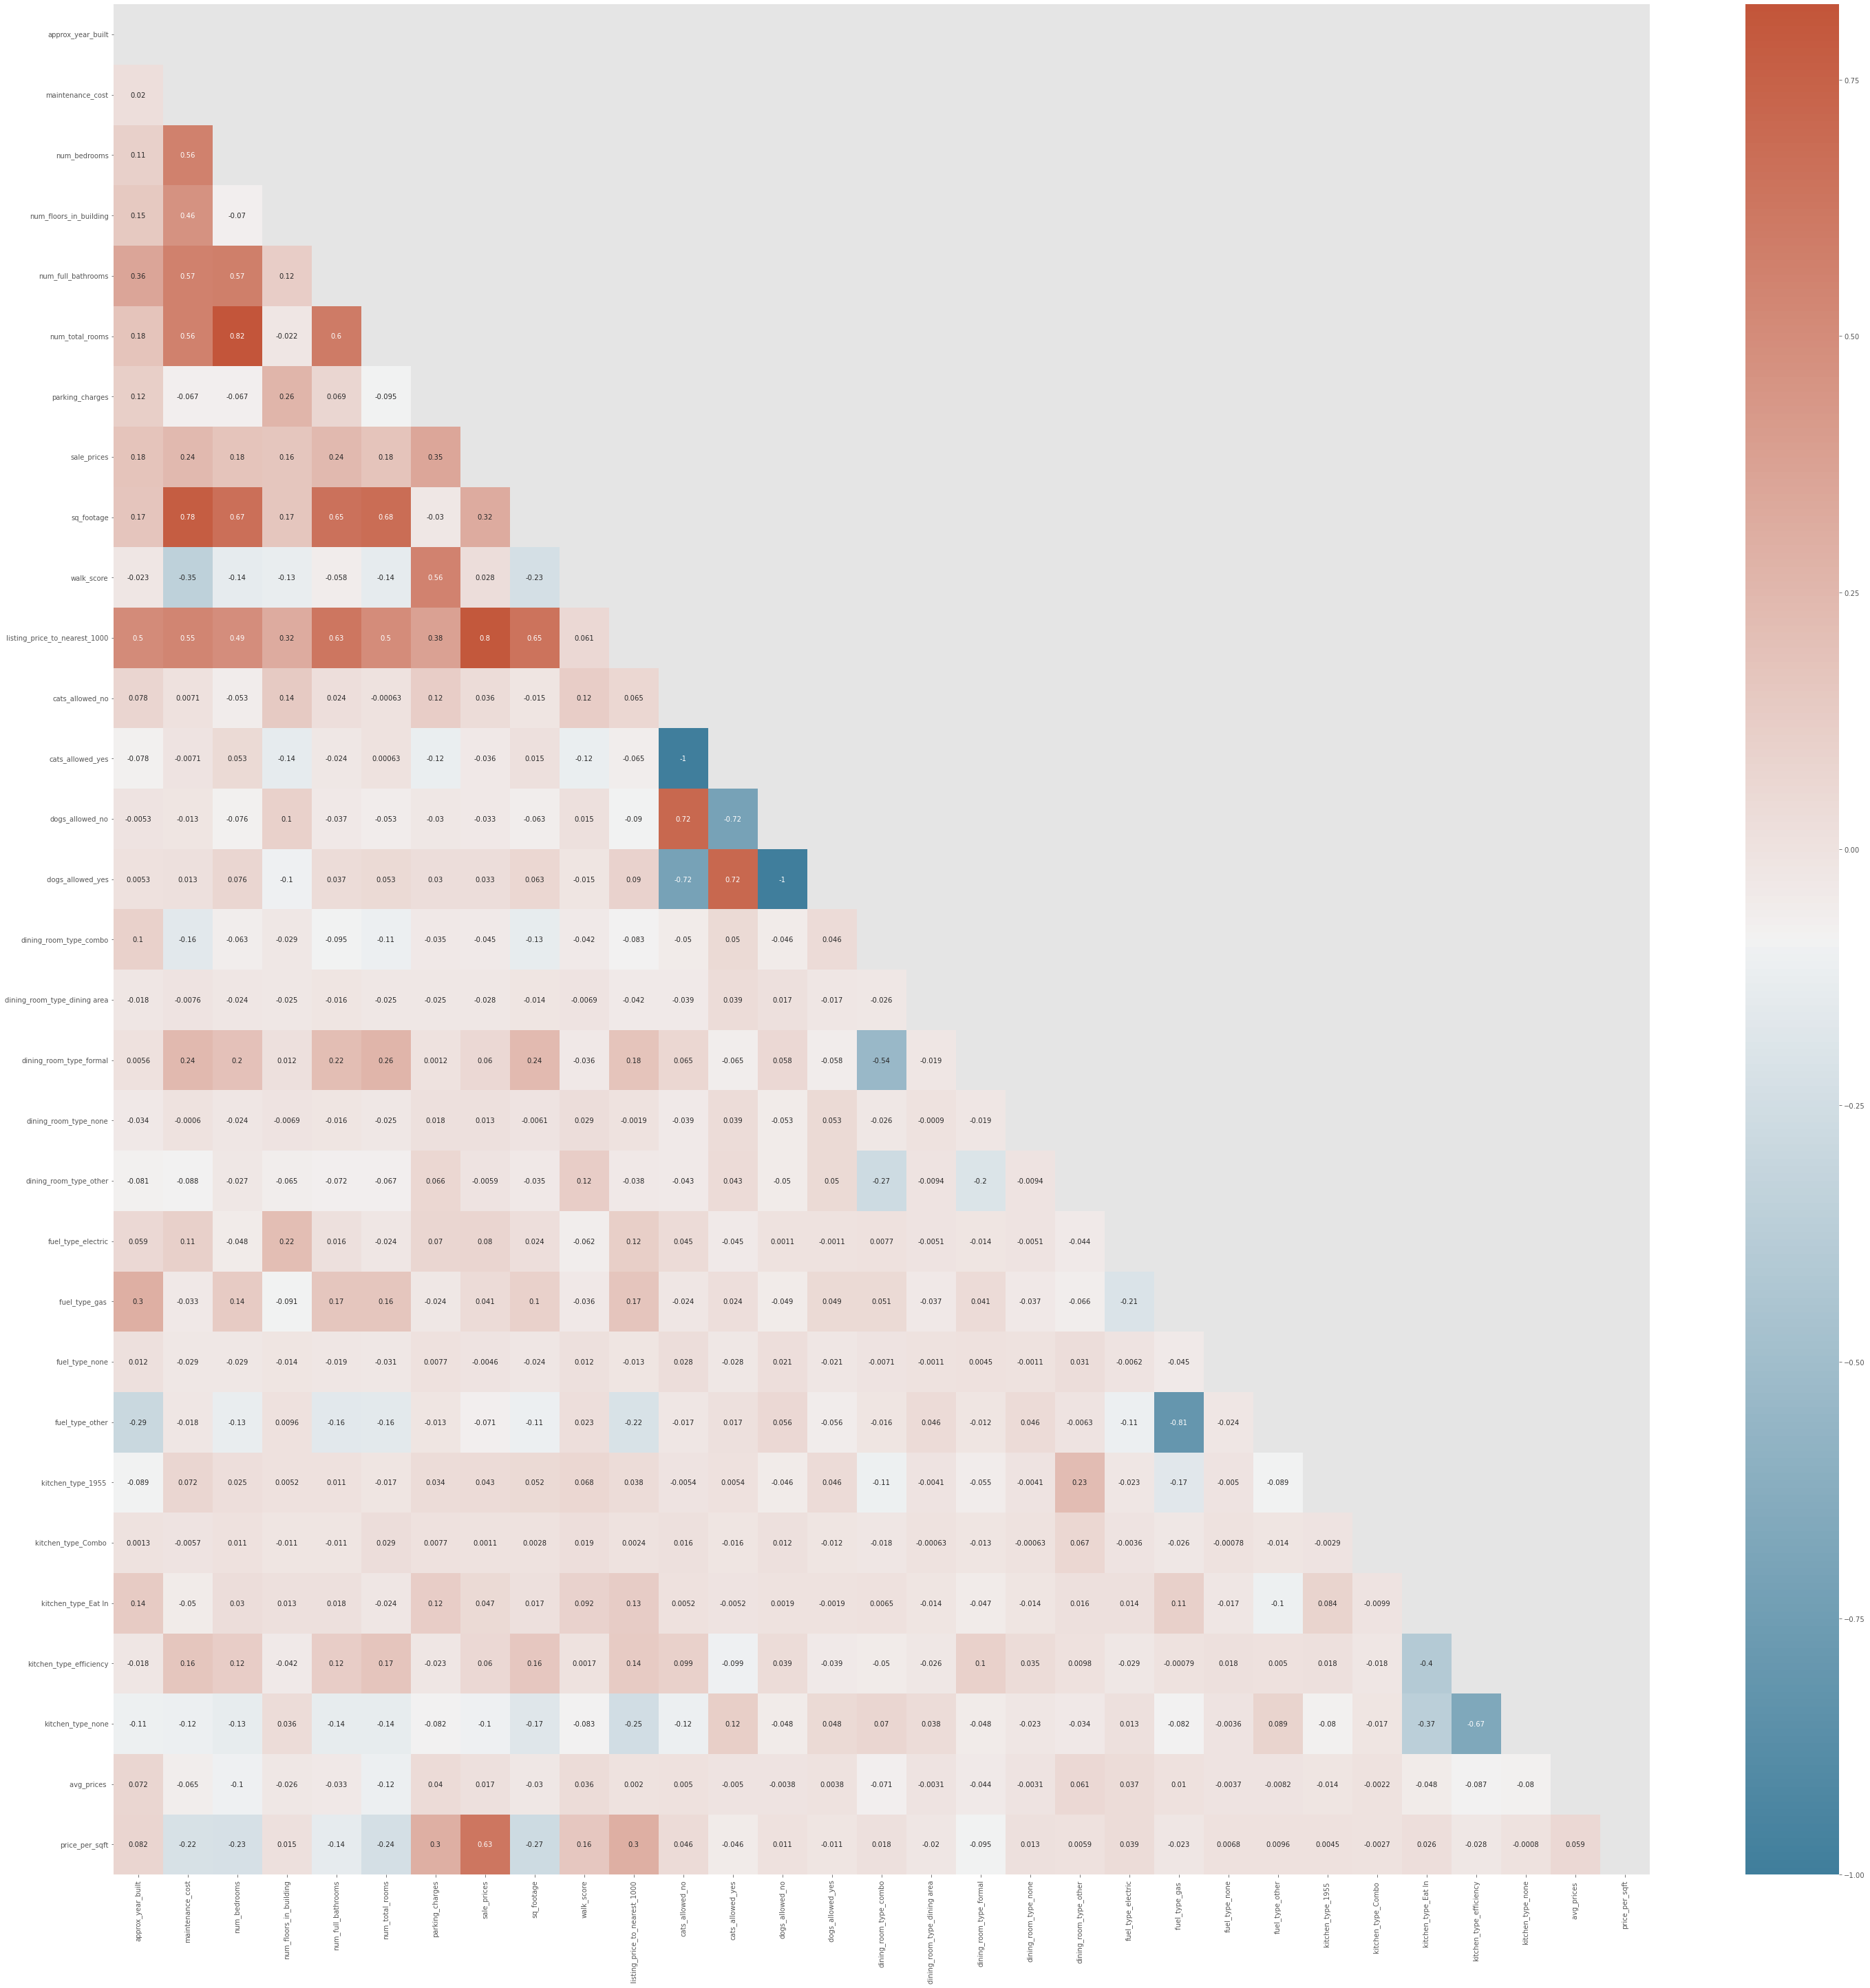

In [54]:
import seaborn as sns
corr = c_data.corr()
f, ax = plt.subplots(figsize=(50, 50))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

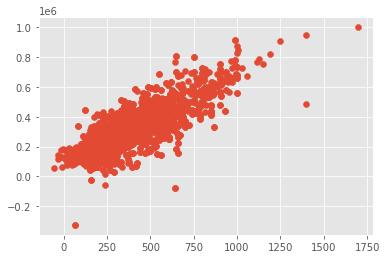

In [55]:
plt.scatter(c_data['listing_price_to_nearest_1000'],c_data['sale_prices'])

In [56]:
new_cdata = c_data[['approx_year_built','num_bedrooms','sq_footage','price_per_sqft',
                    'walk_score','num_full_bathrooms','num_total_rooms','sale_prices','listing_price_to_nearest_1000']]
new_cdata

,approx_year_built,num_bedrooms,sq_footage,price_per_sqft,walk_score,num_full_bathrooms,num_total_rooms,sale_prices,listing_price_to_nearest_1000
0,1955,2.0,934.027807,244.104082,82.0,1.0,5.0,228000.000000,277.215574
1,1955,1.0,890.000000,264.606742,89.0,1.0,4.0,235500.000000,240.294920
2,2004,1.0,550.000000,250.090909,90.0,1.0,3.0,137550.000000,185.155091
3,2002,3.0,1192.232727,457.125516,94.0,2.0,5.0,545000.000000,863.039657
4,1949,2.0,675.000000,358.074074,71.0,1.0,4.0,241700.000000,212.410584
...,...,...,...,...,...,...,...,...,...
2225,1987,2.0,961.298504,490.241667,97.0,1.0,4.0,471268.580667,628.000000
2226,1983,2.0,1447.243548,537.534211,82.0,2.0,5.0,777942.918450,988.000000
2227,2010,3.0,1500.000000,272.457519,96.0,2.0,6.0,408686.278456,850.000000
2228,2010,3.0,1600.000000,264.069573,96.0,2.0,6.0,422511.317600,850.000000


array([[<AxesSubplot:xlabel='approx_year_built', ylabel='approx_year_built'>,
        <AxesSubplot:xlabel='num_bedrooms', ylabel='approx_year_built'>,
        <AxesSubplot:xlabel='sq_footage', ylabel='approx_year_built'>,
        <AxesSubplot:xlabel='price_per_sqft', ylabel='approx_year_built'>,
        <AxesSubplot:xlabel='walk_score', ylabel='approx_year_built'>,
        <AxesSubplot:xlabel='num_full_bathrooms', ylabel='approx_year_built'>,
        <AxesSubplot:xlabel='num_total_rooms', ylabel='approx_year_built'>,
        <AxesSubplot:xlabel='sale_prices', ylabel='approx_year_built'>,
        <AxesSubplot:xlabel='listing_price_to_nearest_1000', ylabel='approx_year_built'>],
       [<AxesSubplot:xlabel='approx_year_built', ylabel='num_bedrooms'>,
        <AxesSubplot:xlabel='num_bedrooms', ylabel='num_bedrooms'>,
        <AxesSubplot:xlabel='sq_footage', ylabel='num_bedrooms'>,
        <AxesSubplot:xlabel='price_per_sqft', ylabel='num_bedrooms'>,
        <AxesSubplot:xlabel='walk_sco

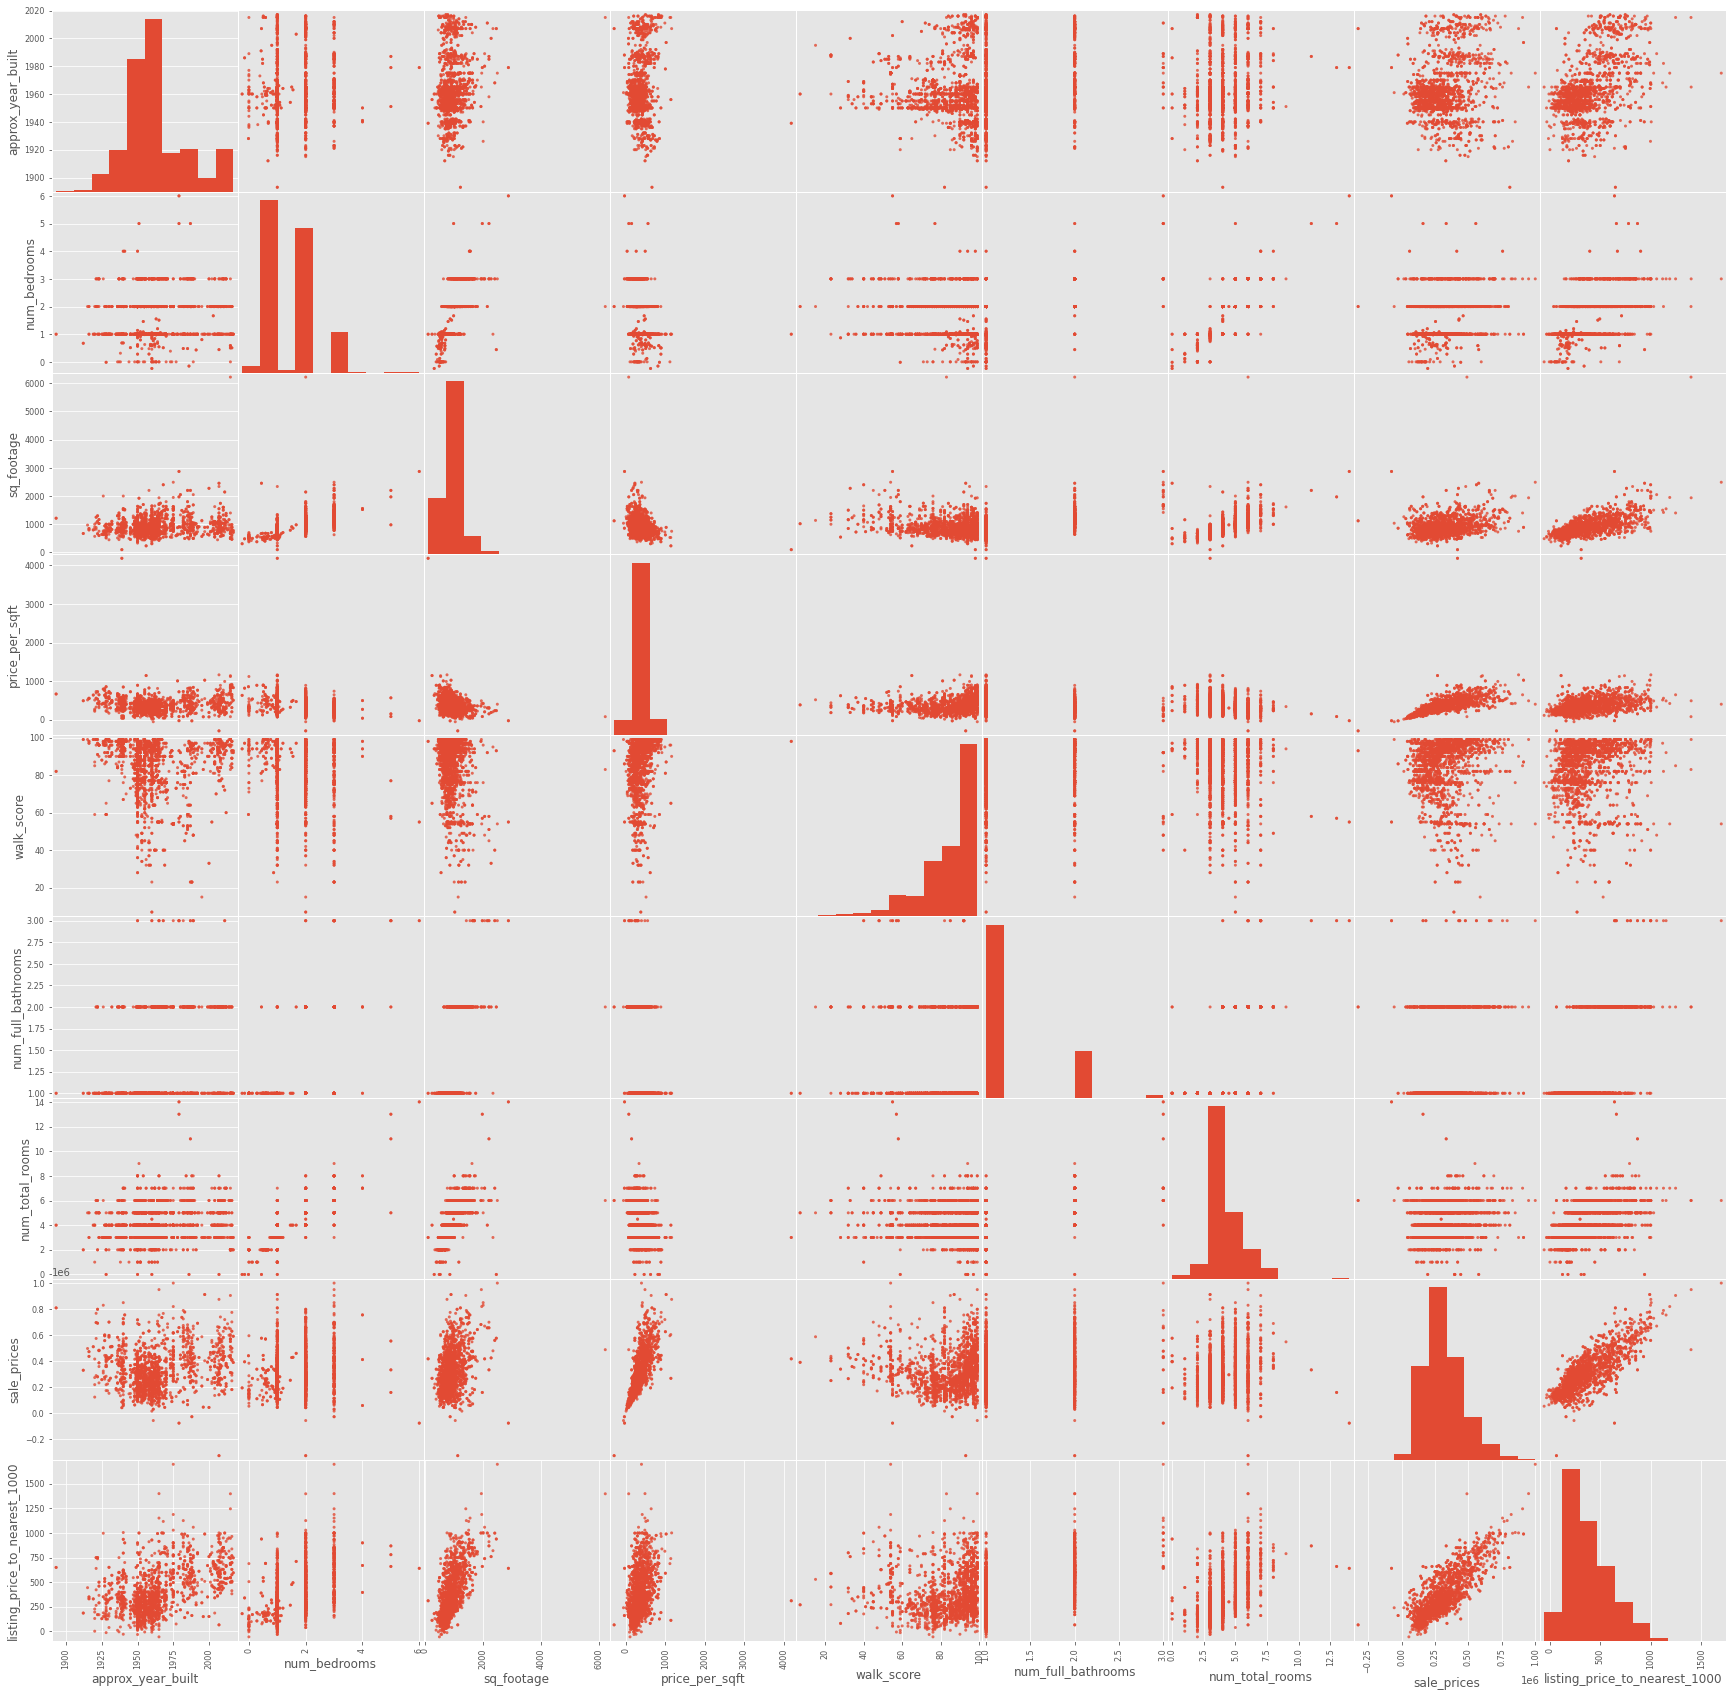

In [112]:
from pandas.plotting import scatter_matrix 
scatter_matrix(new_cdata,figsize=(30,30),alpha=0.8)

# Linear Regression Model

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
hot_bucket = ['sq_footage']
X_data = new_cdata[['listing_price_to_nearest_1000','num_full_bathrooms','num_total_rooms','walk_score','num_bedrooms','approx_year_built','price_per_sqft']].values
y_data = new_cdata['sale_prices'].values
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=10000)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred = reg.predict(X_test)
y_pred

array([262075.93109977, 463334.68394514, 417002.12540731, 146293.65114323,
       593519.79178872, 146293.65114323, 262654.18784354, 143278.88745514,
       516340.17145548, 313965.92604577, 531139.35729467, 210895.99861911,
       387674.01725051, 683366.08560736, 616026.99852555, 375757.35364101,
       400917.63478351, 369606.86681689, 342389.01257602, 195162.35225132,
       289563.98822147, 208448.33183265, 135553.20872146, 248896.22950464,
       216328.64490567, 165243.10089387, 268893.201061  , 406962.59366062,
       140267.07518722, 311737.51758221, 335053.54741183, 365213.86225336,
       446569.82278697, 347482.79377961, 411122.29377696, 109320.67961578,
       257658.91182155, 255905.7993396 , 349666.8928312 , 324589.30713385,
       194593.44639529, 283863.22691689, 414120.81969308, 308528.08465643,
       221284.06709996, 260064.73013863, 308911.29193587, 635576.97070316,
       392775.75057464, 261916.86426952, 479546.21857667,  91893.17396442,
       147691.23089535, 4

In [115]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)
print("R-Squared: %.10f"%reg.score(X_test,y_test))

RMSE: 44167.87617517098
R-Squared: 0.9140122975


In [116]:
print("R-Squared: %.2f"%reg.score(X_test,y_test))

R-Squared: 0.91


# Tree Regression Model

In [117]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0) 
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [118]:
y_pred_tree = tree_reg.predict(X_test)
y_pred_tree

array([224299.68396323, 513983.30202435, 431053.29218649, 165446.11748098,
       477456.5244776 , 165446.11748098, 227711.16997493, 175500.        ,
       558499.74857763, 269556.18254457, 435549.65851413, 252500.        ,
       426823.8406603 , 696856.59319051, 615703.48464146, 351307.14883252,
       425000.        , 356697.02593475, 339056.02737372, 155202.6282877 ,
       271101.97277515, 242372.98258289, 117879.61513748, 266608.72386848,
       207127.25481096, 160631.57698375, 289814.32811731, 400516.52245399,
       158000.        , 302919.15259382, 276391.46722488, 369000.        ,
       460000.        , 369000.        , 407446.69034322, 162000.        ,
       271153.34037488, 235000.        , 295643.69450523, 190632.17745264,
       101450.46199724, 339651.45001887, 421539.61288384, 330000.        ,
       220300.64125436, 232500.        , 342119.33437526, 656718.92770361,
       352357.82743027, 301952.8410802 , 469331.11975659, 130000.        ,
       138752.77119743, 4

In [119]:
MSE = mean_squared_error(y_test,y_pred_tree)
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)
print("R-Squared: %.10f"%tree_reg.score(X_test,y_test))

RMSE: 27814.30719788288
R-Squared: 0.9658995739


# Random Forest Regression Model

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(X_train,y_train)

In [121]:
y_predict_rf = rf.predict(X_test)
print(y_predict_rf)

[232008.08552001 511351.05019123 418511.80427469 185618.44077131
 470520.70285365 185618.44077131 225812.91495988 165893.85462969
 563701.04292754 254719.12133114 483451.67380579 229635.81744206
 415808.0542552  677899.1857898  606159.69075914 345266.86484102
 383230.45409593 338534.93916811 332694.69455795 149803.16466464
 269934.21780317 255645.1855433  113691.29012447 255043.49895343
 214150.71799208 168021.38224471 293447.60156569 395637.42290196
 145524.63842077 301607.90811263 281456.59356178 369144.56513962
 457254.90848466 359490.87561117 419920.45384827 169353.57932129
 289190.55655124 253743.08799369 293702.78019633 213723.19006362
 123272.933116   342960.46320396 414681.33009481 340807.18454127
 228549.88503931 254358.59847564 335317.55252835 642188.20231075
 370172.08349071 303594.24707372 477544.98845833 141123.50643743
 143299.68449203 445347.01945316 178232.20517731 363149.21868757
 268959.65206599 130337.20909204 314828.29408391 293462.23293422
 208786.55542869 155222.3

In [122]:
MSE = mean_squared_error(y_test,y_predict_rf)
RMSE = np.sqrt(MSE)
print("RMSE:",RMSE)
print("R-Squared: %.10f"%tree_reg.score(X_test,y_test))

RMSE: 24977.804591200136
R-Squared: 0.9658995739
